In [1]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


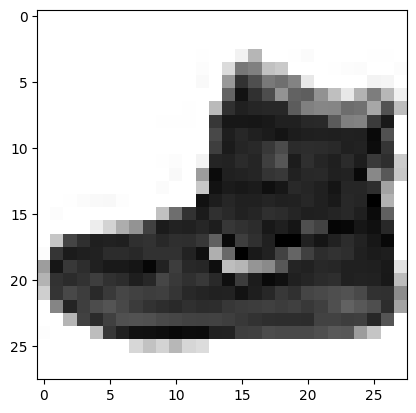

In [2]:
# Visualize
import matplotlib.pyplot as plt

plt.imshow(train_data[0], cmap=plt.cm.binary)

In [3]:
# Check Maximum and Minimum values
train_data.min(), train_data.max(), test_data.min(), test_data.max()

(0, 255, 0, 255)

In [4]:
# normalize data
train_data_norm = train_data/train_data.max()
test_data_norm = test_data/test_data.max()

In [5]:
train_data.max(), train_data.min()

(255, 0)

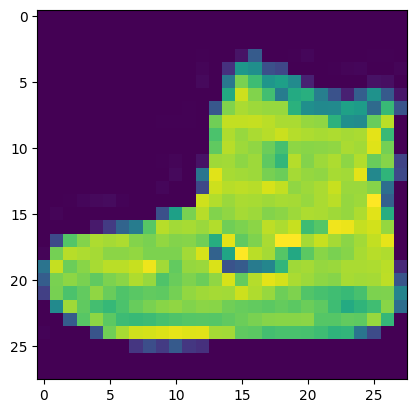

In [6]:
# Visualize Data

plt.imshow(train_data_norm[0])

In [7]:
# check shape
import tensorflow as tf

train_labels.shape, test_labels.shape, train_data_norm.shape, test_data_norm.shape

((60000,), (10000,), (60000, 28, 28), (10000, 28, 28))

In [8]:
# build model

tf.random.set_seed(42)

model_ex2 = tf.keras.Sequential(
    [
      tf.keras.layers.Flatten(input_shape = (28, 28)),
      tf.keras.layers.Dense(10, activation = "relu"),
      tf.keras.layers.Dense(10,activation = "relu"),
      tf.keras.layers.Dense(10, activation = "softmax")
    ]
)
max_epoch = 20
model_ex2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
           optimizer = tf.keras.optimizers.Adam(learning_rate= 1e-3),
           metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10**(epochs/max_epoch))

ex2 = model_ex2.fit(train_data_norm,
                    train_labels,
                    epochs = max_epoch,
                    validation_data = (test_data_norm, test_labels),
                    callbacks = [lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.6906 - accuracy: 0.7572 - val_loss: 0.5018 - val_accuracy: 0.8259 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4605 - accuracy: 0.8404 - val_loss: 0.5205 - val_accuracy: 0.8213 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4321 - accuracy: 0.8476 - val_loss: 0.4692 - val_accuracy: 0.8327 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4158 - accuracy: 0.8530 - val_loss: 0.4618 - val_accuracy: 0.8418 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4088 - accuracy: 0.8549 - val_loss: 0.4502 - val_accuracy: 0.8396 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4008 - accuracy: 0.8567 - val_loss: 0.4818 - val_accuracy: 0.8222 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 5

Text(0.5, 1.0, 'LR vs Loss')

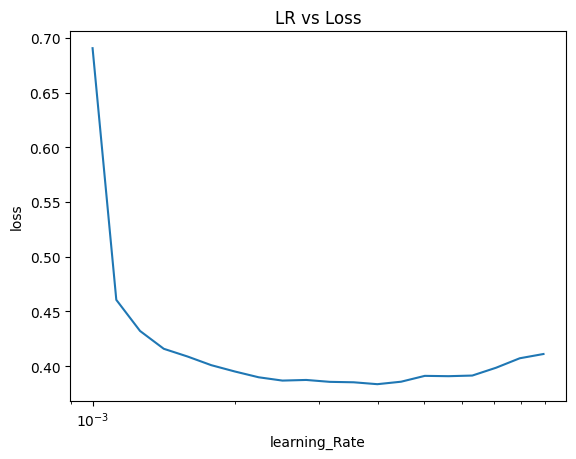

In [19]:
# Observe best learning rate
import pandas as pd

lrs = 1e-3 * (10**(tf.range(max_epoch)/max_epoch))
plt.semilogx(lrs,  ex2.history["loss"])
plt.xlabel("learning_Rate")
plt.ylabel("loss")
plt.title("LR vs Loss")

In [10]:
# confusion matrix

# prettify confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

figsize = (10,10)

def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10,10), text_size = 15):

  # create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float")/cm.sum(axis = 1)[:, np.newaxis] # normalize confusion matrix

  n_classes = cm.shape[0]

  #prettify
  fig, ax = plt.subplots(figsize = figsize)
  # create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set classes to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title="Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)
  # set x axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j] * 100:.1f}%)",
              horizontalalignment = "center",
              color = "white" if cm[i,j] > threshold else "black",
              size = 15)

313/313 [==============================] - 1s 2ms/step


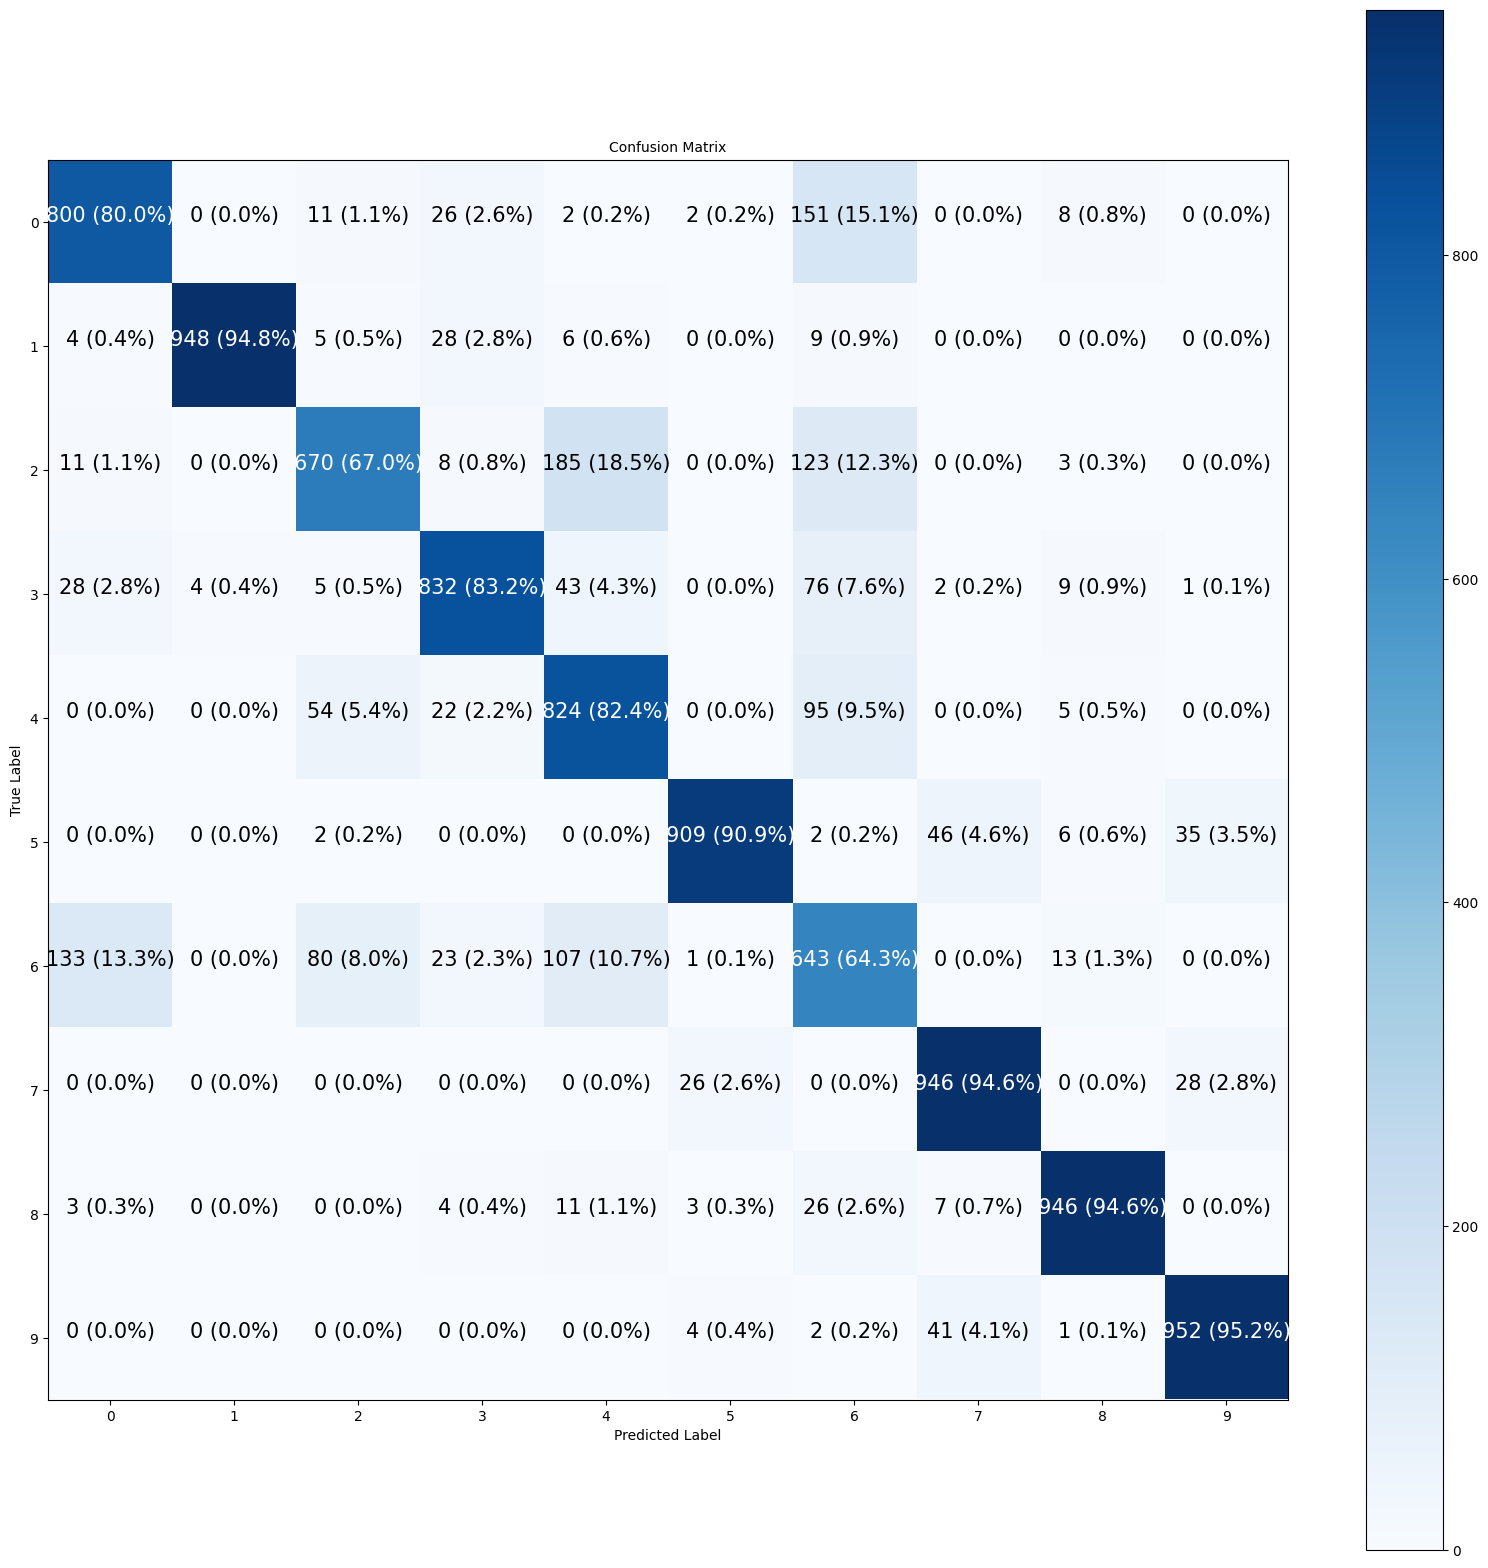

In [11]:
# Evaluate

y_probs = model_ex2.predict(test_data_norm)
y_preds = y_probs.argmax(axis = 1)
y_preds

y_true = test_labels

make_confusion_matrix(y_true, y_preds, classes = None, figsize = (20,20), text_size = 10)

In [15]:
loss,acc = model_ex2.evaluate(test_data_norm, test_labels)

print("Loss: {:.2f}\nAccuracy: {:.2f}".format(loss, acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.4336 - accuracy: 0.8470
Loss: 0.43
Accuracy: 0.85


1/1 [==============================] - 0s 83ms/step


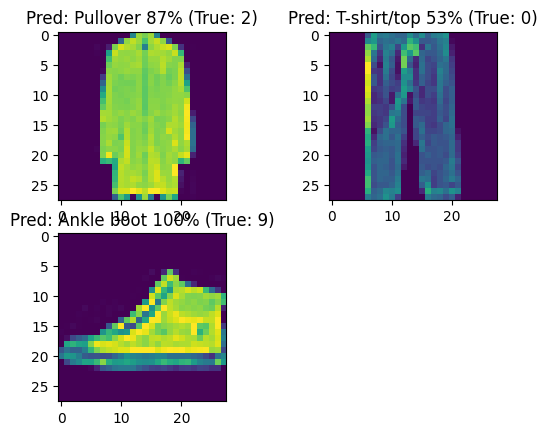

In [20]:
# Plot random image and predictions

import random

class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker",
              "Bag","Ankle boot"]

for i in range(3):
  plt.subplot(2,2,i+1)
  rand_index =  random.choice(range(len(test_data)))
  input_data = test_data_norm[rand_index]

  pred_probs = model_ex2.predict(input_data.reshape(1,28,28))
  true_label = test_labels[rand_index]
  plt.imshow(train_data[rand_index])
  plt.title("Pred: {} {:2.0f}% (True: {})".format(
        class_names[np.argmax(pred_probs)],
        100*np.max(pred_probs),
        true_label))